# Data analyst

## Load libraries

In [444]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

## Load data

In [445]:
ROOT_PATH = os.pardir

RAW_DATA_PATH = ROOT_PATH + '\\data\\raw\\'

# print(os.path.abspath(os.pardir))


In [446]:
measure1_df = pd.read_csv(RAW_DATA_PATH + 'measure1_smartphone_sens.csv')
measure1_df.columns = measure1_df.columns.str.strip()

In [447]:
measure1_df.insert(0, 'datetime', pd.to_datetime(measure1_df['timestamp'], unit='ms'))
measure1_df.head()

,datetime,timestamp,AccelerationX,AccelerationY,AccelerationZ,MagneticFieldX,MagneticFieldY,MagneticFieldZ,Z-AxisAgle(Azimuth),X-AxisAngle(Pitch),Y-AxisAngle(Roll),GyroX,GyroY,GyroZ
0,2015-01-30 14:51:23.421,1422629483421,-3.577,2.104,9.078,-5.4,-17.9,-28.2,126.404,-12.169,-21.001,0,0,0
1,2015-01-30 14:51:23.520,1422629483520,-3.424,2.927,9.374,-4.3,-21.9,-26.9,134.694,-11.322,-25.898,0,0,0
2,2015-01-30 14:51:23.620,1422629483620,-2.505,2.908,8.867,-0.7,-24.4,-26.5,150.906,-17.523,-15.017,0,0,0
3,2015-01-30 14:51:23.723,1422629483723,-5.473,1.472,9.394,0.3,-25.7,-26.9,138.022,-21.068,-23.941,0,0,0
4,2015-01-30 14:51:23.822,1422629483822,-3.414,2.018,8.187,3.7,-29.6,-23.9,163.519,-12.814,-22.046,0,0,0


In [448]:
measure1_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18354 entries, 0 to 18353
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             18354 non-null  datetime64[ns]
 1   timestamp            18354 non-null  int64         
 2   AccelerationX        18354 non-null  float64       
 3   AccelerationY        18354 non-null  float64       
 4   AccelerationZ        18354 non-null  float64       
 5   MagneticFieldX       18354 non-null  float64       
 6   MagneticFieldY       18354 non-null  float64       
 7   MagneticFieldZ       18354 non-null  float64       
 8   Z-AxisAgle(Azimuth)  18354 non-null  float64       
 9   X-AxisAngle(Pitch)   18354 non-null  float64       
 10  Y-AxisAngle(Roll)    18354 non-null  float64       
 11  GyroX                18354 non-null  int64         
 12  GyroY                18354 non-null  int64         
 13  GyroZ                18354 non-

In [449]:
print(f'The first day of the measure 1 is {measure1_df.datetime.dt.date.min()} and the last day is {measure1_df.datetime.dt.date.max()}.')

The first day of the measure 1 is 2015-01-30 and the last day is 2015-02-05.


### Timestamp measure 1

In [450]:
m1_timestamp_df = pd.read_csv(RAW_DATA_PATH + 'measure1_timestamp_id.csv',
                              header=None, names=['arrival_ts', 'departure_ts', 'place_id'])
m1_timestamp_df.head()

,arrival_ts,departure_ts,place_id
0,1422629490743,1422629492743,34
1,1422629495152,1422629499732,94
2,1422629501522,1422629505849,95
3,1422629507213,1422629511556,35
4,1422629513047,1422629517152,36


In [451]:
m1_timestamp_df.insert(0, 'arrival_dt', pd.to_datetime(m1_timestamp_df['arrival_ts'], unit='ms'))
m1_timestamp_df.insert(2, 'departure_dt', pd.to_datetime(m1_timestamp_df['departure_ts'], unit='ms'))

In [452]:
m1_timestamp_df.sort_values(by='arrival_dt').head(10)


,arrival_dt,arrival_ts,departure_dt,departure_ts,place_id
0,2015-01-30 14:51:30.743,1422629490743,2015-01-30 14:51:32.743,1422629492743,34
1,2015-01-30 14:51:35.152,1422629495152,2015-01-30 14:51:39.732,1422629499732,94
2,2015-01-30 14:51:41.522,1422629501522,2015-01-30 14:51:45.849,1422629505849,95
3,2015-01-30 14:51:47.213,1422629507213,2015-01-30 14:51:51.556,1422629511556,35
4,2015-01-30 14:51:53.047,1422629513047,2015-01-30 14:51:57.152,1422629517152,36
5,2015-01-30 14:51:58.651,1422629518651,2015-01-30 14:52:01.776,1422629521776,96
6,2015-01-30 14:52:03.052,1422629523052,2015-01-30 14:52:05.921,1422629525921,97
7,2015-01-30 14:52:07.786,1422629527786,2015-01-30 14:52:10.685,1422629530685,37
8,2015-01-30 14:52:12.364,1422629532364,2015-01-30 14:52:15.214,1422629535214,38
9,2015-01-30 14:52:17.055,1422629537055,2015-01-30 14:52:20.053,1422629540053,98


In [453]:
m1_timestamp_df.tail(30)

,arrival_dt,arrival_ts,departure_dt,departure_ts,place_id
294,2015-02-04 10:05:16.733,1423044316733,2015-02-04 10:05:19.584,1423044319584,296
295,2015-02-04 10:05:21.156,1423044321156,2015-02-04 10:05:24.387,1423044324387,290
296,2015-02-04 10:05:26.081,1423044326081,2015-02-04 10:05:28.761,1423044328761,284
297,2015-02-04 10:05:30.641,1423044330641,2015-02-04 10:05:33.396,1423044333396,278
298,2015-02-04 10:05:35.218,1423044335218,2015-02-04 10:05:38.018,1423044338018,268
299,2015-02-04 10:05:39.530,1423044339530,2015-02-04 10:05:42.296,1423044342296,258
300,2015-02-04 10:05:43.983,1423044343983,2015-02-04 10:05:46.730,1423044346730,257
301,2015-02-04 10:05:48.442,1423044348442,2015-02-04 10:05:50.442,1423044350442,267
302,2015-02-04 13:17:45.782,1423055865782,2015-02-04 13:17:51.639,1423055871639,21
303,2015-02-04 13:17:54.559,1423055874559,2015-02-04 13:17:57.753,1423055877753,22


In [454]:
m1_timestamp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   arrival_dt    324 non-null    datetime64[ns]
 1   arrival_ts    324 non-null    int64         
 2   departure_dt  324 non-null    datetime64[ns]
 3   departure_ts  324 non-null    int64         
 4   place_id      324 non-null    int64         
dtypes: datetime64[ns](2), int64(3)
memory usage: 12.8 KB


In [455]:
print('Samples in place 2:', measure1_df[(measure1_df.timestamp >= 1423127565596) & (measure1_df.timestamp <= 1423127569877)].count()[0])

Samples in place 2: 42


In [456]:
print('Samples in place 3:', measure1_df[(measure1_df.timestamp >= 1423127571881) & (measure1_df.timestamp <= 1423127575826)].count()[0])

Samples in place 3: 40


In [457]:
print('Samples in place 2:', measure1_df[(measure1_df.timestamp >= 1423127565596) & (measure1_df.timestamp <= 1423127569877)])

Samples in place 2:                      datetime      timestamp  AccelerationX  AccelerationY  \
17576 2015-02-05 09:12:45.685  1423127565685         -0.944          5.388   
17577 2015-02-05 09:12:45.786  1423127565786         -0.771          5.647   
17578 2015-02-05 09:12:45.885  1423127565885         -0.618          5.848   
17579 2015-02-05 09:12:45.985  1423127565985         -0.474          5.915   
17580 2015-02-05 09:12:46.085  1423127566085         -0.561          5.819   
17581 2015-02-05 09:12:46.185  1423127566185         -0.608          5.848   
17582 2015-02-05 09:12:46.284  1423127566284         -0.618          5.886   
17583 2015-02-05 09:12:46.385  1423127566385         -0.474          5.982   
17584 2015-02-05 09:12:46.485  1423127566485         -0.417          6.049   
17585 2015-02-05 09:12:46.585  1423127566585         -0.647          6.107   
17586 2015-02-05 09:12:46.684  1423127566684         -0.541          6.059   
17587 2015-02-05 09:12:46.785  1423127566785

### Join sensors measures with timestamps id

In [458]:
measure1_df['timestamp'].unique().shape

(18354,)

In [459]:
def return_place_id(timestamp):
    selected = m1_timestamp_df[(m1_timestamp_df.arrival_ts <= timestamp) &
             (m1_timestamp_df.departure_ts >= timestamp)]
    if selected.shape[0] == 0:
        return None
    else:
        return m1_timestamp_df[(m1_timestamp_df.arrival_ts <= timestamp) &
             (m1_timestamp_df.departure_ts >= timestamp)].iloc[0]['place_id']

In [460]:
measure_test = measure1_df.iloc[:1000,:].copy()
measure_test['place_id'] = measure_test['timestamp'].apply(lambda x: return_place_id(x))

In [461]:
measure_test[measure_test['place_id'].notnull()].shape

(682, 15)

In [462]:
print('Length of raw dataset:', measure1_df.shape[0])

Length of raw dataset: 18354


In [463]:
measure1_df['place_id'] = measure1_df['timestamp'].apply(lambda x: return_place_id(x))
measure1_df.dropna(axis=0, inplace=True)
measure1_df['place_id'] = measure1_df['place_id'].apply(lambda x: int(x))

In [464]:
print('Length of dataset belong to a point:', measure1_df.shape[0])

Length of dataset belong to a point: 11498


In [465]:
measure1_df.head()

,datetime,timestamp,AccelerationX,AccelerationY,AccelerationZ,MagneticFieldX,MagneticFieldY,MagneticFieldZ,Z-AxisAgle(Azimuth),X-AxisAngle(Pitch),Y-AxisAngle(Roll),GyroX,GyroY,GyroZ,place_id
74,2015-01-30 14:51:30.821,1422629490821,-0.656,2.410,9.078,-16.0,14.2,-28.2,40.720,-14.825,-3.992,0,0,0,34
75,2015-01-30 14:51:30.922,1422629490922,0.148,2.602,9.480,-16.0,13.6,-28.2,42.962,-12.337,-4.027,0,0,0,34
76,2015-01-30 14:51:31.021,1422629491021,0.474,2.468,9.202,-16.4,13.0,-28.2,37.137,-14.982,2.842,0,0,0,34
77,2015-01-30 14:51:31.121,1422629491121,0.052,3.282,9.135,-16.4,11.8,-28.2,38.238,-19.758,0.300,0,0,0,34
78,2015-01-30 14:51:31.221,1422629491221,-0.474,2.966,8.800,-16.4,11.8,-28.2,39.383,-16.733,0.947,0,0,0,34


### Points mapping

In [466]:
points_df = pd.read_excel(RAW_DATA_PATH + 'PointsMapping.ods', engine='odf', index_col=0)
points_df.head()

,X,Y
ID,,
1,0.6,0.6
2,1.2,0.6
3,1.8,0.6
4,0.6,1.2
5,1.8,1.2


In [467]:
points_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 1 to 325
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       325 non-null    float64
 1   Y       325 non-null    float64
dtypes: float64(2)
memory usage: 7.6 KB


In [468]:
points_df.iloc[0, 0]

0.6

In [469]:
points_df.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            316, 317, 318, 319, 320, 321, 322, 323, 324, 325],
           dtype='int64', name='ID', length=325)

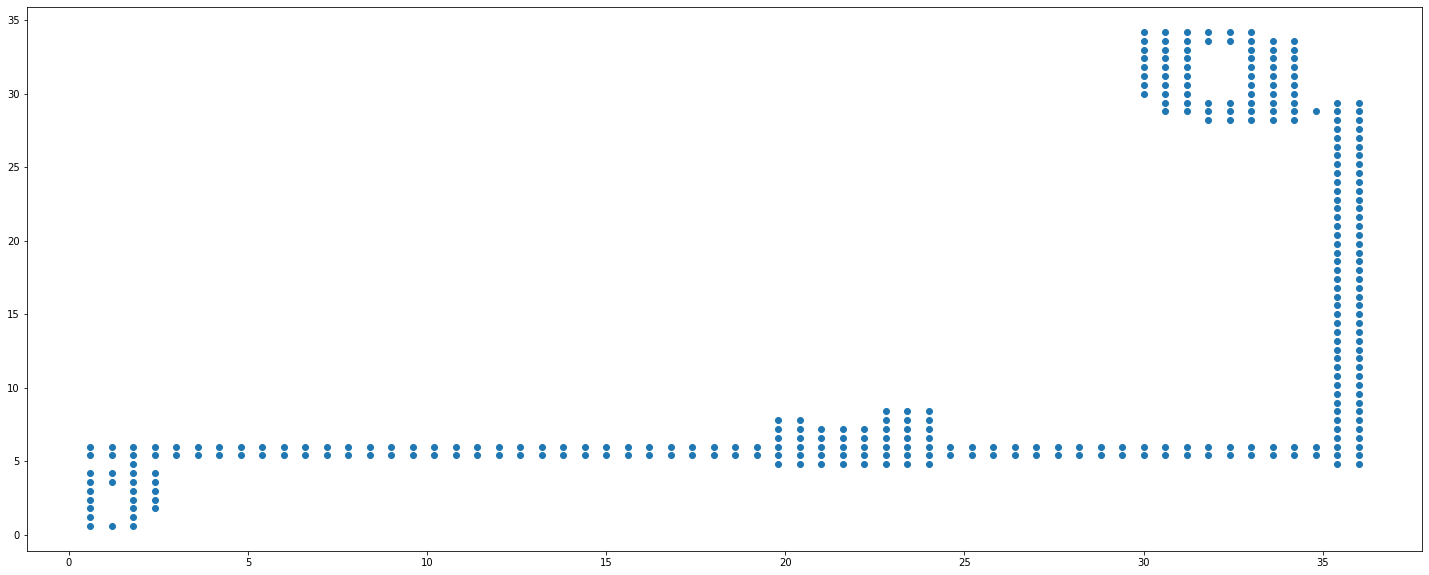

In [470]:
plt.figure(figsize=(25, 10))
plt.scatter(points_df.X, points_df.Y)
# for i, label in enumerate(points_df.index):
#     plt.text(points_df.iloc[i, 0], points_df.iloc[i, 1], label)

In [471]:
import plotly.express as px

fig = px.scatter(points_df, x="X", y="Y", text=range(0, 325))

fig.update_traces(textposition='top center')

fig.update_layout(
    height=800,
    title_text='GDP and Life Expectancy (Americas, 2007)'
)

fig.show()

In [472]:
points_df

,X,Y
ID,,
1,0.6,0.6
2,1.2,0.6
3,1.8,0.6
4,0.6,1.2
5,1.8,1.2
...,...,...
321,30.6,34.2
322,31.2,34.2
323,31.8,34.2


### Smartphone WIFI - Measure 1

In [473]:
col = [f'WAP{str(num).zfill(3)}' for num in range(1, 128)]
# col.insert(0, 'id')

In [474]:
m1_wifi_df = pd.read_csv(RAW_DATA_PATH + 'measure1_smartphone_wifi.csv',
                              header=None, names=col)
m1_wifi_df.index.name = 'id'
m1_wifi_df.index = range(1,326)
m1_wifi_df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP118,WAP119,WAP120,WAP121,WAP122,WAP123,WAP124,WAP125,WAP126,WAP127
1,-100,-100,-100,-100,-82,-82,-100,-100,-100,-100,...,-100,-71,-71,-60,-100,-78,-100,-100,-86,-86
2,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100
3,-100,-100,-100,-100,-90,-100,-100,-100,-100,-100,...,-100,-70,-69,-66,-100,-100,-100,-100,-86,-86
4,-100,-100,-100,-100,-88,-87,-100,-100,-100,-100,...,-100,-70,-75,-69,-100,-81,-100,-100,-86,-86
5,-100,-100,-100,-100,-80,-82,-100,-100,-100,-100,...,-100,-71,-71,-65,-63,-83,-100,-100,-100,-100


### Join WIFI signal with sensor signals

In [475]:
m1_wifi_df = m1_wifi_df.reset_index()
m1_wifi_df.rename(columns={'index': 'place_id'}, inplace=True)

In [476]:
signals = m1_wifi_df.copy()
signals = signals.merge(measure1_df[['MagneticFieldX', 'MagneticFieldY', 'MagneticFieldZ', 'place_id']])

Insert the coordinates

In [477]:
signals['x'] = [points_df.loc[id, 'X'] for id in signals.place_id]
signals['y'] = [points_df.loc[id, 'Y'] for id in signals.place_id]

In [478]:
signals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11456 entries, 0 to 11455
Columns: 133 entries, place_id to y
dtypes: float64(5), int64(128)
memory usage: 11.7 MB


In [479]:
print("Length original", len(signals))

print("Length duplicates:", signals[signals.duplicated()].shape[0])

signals = signals.drop_duplicates(keep = 'last')
print("Length without duplicates:", len(signals))

Length original 11456
Length duplicates: 6386
Length without duplicates: 5070


In [481]:
signals.to_excel('signals_measure1.xlsx')

In [483]:
signals.head(5)

,place_id,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,...,WAP123,WAP124,WAP125,WAP126,WAP127,MagneticFieldX,MagneticFieldY,MagneticFieldZ,x,y
3,2,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-15.4,-0.2,-33.3,1.2,0.6
6,2,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-15.4,-0.8,-33.3,1.2,0.6
7,2,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-15.4,-1.2,-33.3,1.2,0.6
9,2,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-15.4,-1.2,-33.7,1.2,0.6
14,2,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-15.0,-1.2,-33.7,1.2,0.6


### Smartphone WIFI - Measure 2

In [484]:
m2_wifi_df = pd.read_csv(RAW_DATA_PATH + 'measure2_smartphone_wifi.csv',
                              header=None, names=col)
m2_wifi_df.index.name = 'id'
m2_wifi_df.index = range(1,326)
m2_wifi_df.head(100)

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP118,WAP119,WAP120,WAP121,WAP122,WAP123,WAP124,WAP125,WAP126,WAP127
1,-100,-100,-100,-100,-82,-83,-100,-100,-100,-100,...,-100,-71,-71,-60,-100,-88,-100,-100,-85,-83
2,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100
3,-100,-100,-100,-100,-85,-88,-100,-100,-100,-100,...,-100,-72,-70,-67,-100,-88,-100,-100,-87,-84
4,-100,-100,-100,-100,-79,-79,-100,-100,-100,-100,...,-100,-71,-70,-67,-100,-88,-100,-100,-85,-84
5,-100,-100,-100,-100,-83,-85,-100,-100,-100,-100,...,-100,-69,-68,-62,-100,-100,-100,-100,-84,-79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,-100,-100,-100,-100,-84,-84,-100,-100,-100,-100,...,-100,-49,-50,-61,-100,-90,-100,-100,-100,-100
97,-100,-100,-100,-100,-84,-84,-100,-100,-100,-100,...,-100,-54,-53,-58,-100,-100,-100,-100,-87,-88
98,-100,-100,-100,-100,-82,-83,-100,-100,-100,-100,...,-100,-49,-49,-56,-52,-100,-100,-100,-87,-88
99,-100,-100,-100,-100,-88,-88,-100,-100,-100,-100,...,-100,-50,-51,-56,-53,-86,-100,-100,-87,-88


In [485]:
m2_wifi_df.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP118,WAP119,WAP120,WAP121,WAP122,WAP123,WAP124,WAP125,WAP126,WAP127
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,...,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,-88.990769,-88.846154,-76.415385,-76.196923,-93.252308,-93.670769,-88.156923,-88.236923,-99.815385,-99.406154,...,-89.160000,-80.403077,-80.581538,-82.203077,-86.596923,-98.406154,-72.021538,-72.972308,-97.686154,-97.258462
std,14.592507,13.991213,23.677418,23.899571,7.996780,8.089349,14.135696,13.995233,1.656379,2.721875,...,13.319632,21.994822,22.315159,19.735175,18.960338,4.385860,20.089679,19.930028,5.367940,5.756448
min,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,...,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000
25%,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,...,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-86.000000,-92.000000,-100.000000,-100.000000
50%,-100.000000,-100.000000,-85.000000,-83.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,...,-100.000000,-84.000000,-100.000000,-88.000000,-100.000000,-100.000000,-73.000000,-73.000000,-100.000000,-100.000000
75%,-73.000000,-73.000000,-52.000000,-52.000000,-86.000000,-86.000000,-74.000000,-74.000000,-100.000000,-100.000000,...,-77.000000,-64.000000,-63.000000,-65.000000,-77.000000,-100.000000,-59.000000,-55.000000,-100.000000,-100.000000
max,-54.000000,-61.000000,-30.000000,-30.000000,-72.000000,-74.000000,-59.000000,-59.000000,-85.000000,-85.000000,...,-58.000000,-33.000000,-32.000000,-36.000000,-37.000000,-83.000000,-29.000000,-29.000000,-79.000000,-78.000000


Insert the coordinates

In [486]:
m2_wifi_df['x'] = [points_df.loc[id, 'X'] for id in m2_wifi_df.index]
m2_wifi_df['y'] = [points_df.loc[id, 'Y'] for id in m2_wifi_df.index]

In [487]:
m2_wifi_df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP120,WAP121,WAP122,WAP123,WAP124,WAP125,WAP126,WAP127,x,y
1,-100,-100,-100,-100,-82,-83,-100,-100,-100,-100,...,-71,-60,-100,-88,-100,-100,-85,-83,0.6,0.6
2,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-100,1.2,0.6
3,-100,-100,-100,-100,-85,-88,-100,-100,-100,-100,...,-70,-67,-100,-88,-100,-100,-87,-84,1.8,0.6
4,-100,-100,-100,-100,-79,-79,-100,-100,-100,-100,...,-70,-67,-100,-88,-100,-100,-85,-84,0.6,1.2
5,-100,-100,-100,-100,-83,-85,-100,-100,-100,-100,...,-68,-62,-100,-100,-100,-100,-84,-79,1.8,1.2


## Analyze data

In [488]:
measure1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11498 entries, 74 to 18258
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             11498 non-null  datetime64[ns]
 1   timestamp            11498 non-null  int64         
 2   AccelerationX        11498 non-null  float64       
 3   AccelerationY        11498 non-null  float64       
 4   AccelerationZ        11498 non-null  float64       
 5   MagneticFieldX       11498 non-null  float64       
 6   MagneticFieldY       11498 non-null  float64       
 7   MagneticFieldZ       11498 non-null  float64       
 8   Z-AxisAgle(Azimuth)  11498 non-null  float64       
 9   X-AxisAngle(Pitch)   11498 non-null  float64       
 10  Y-AxisAngle(Roll)    11498 non-null  float64       
 11  GyroX                11498 non-null  int64         
 12  GyroY                11498 non-null  int64         
 13  GyroZ                11498 non

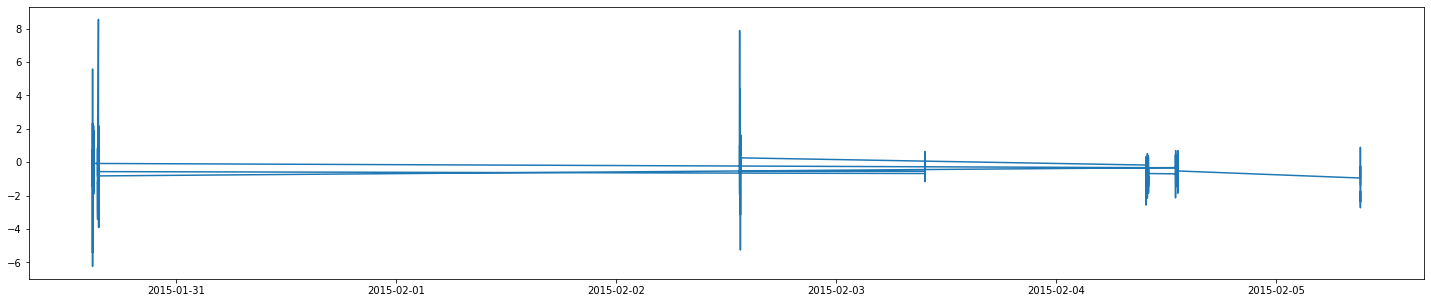

In [489]:
plt.figure(figsize=(25, 5))
plt.plot(measure1_df.datetime, measure1_df.AccelerationX)

The data is not sorted.

In [490]:
# Sort the dataframe
measure1_df = measure1_df.sort_values(by='datetime')

In [ ]:
# rng = range(0, 2000)
# plt.figure(figsize=(25, 5))
# plt.plot(measure1_df.datetime[rng], measure1_df.AccelerationX[rng])


In [492]:
import plotly.express as px
import pandas as pd

fig = px.line(measure1_df.iloc[rng], x='datetime', y='AccelerationX', title='Time Series of acceleration in x')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [493]:
fig = px.line(measure1_df, x='datetime', y='AccelerationX', title='Time Series of acceleration in x')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [494]:
measure1_df[measure1_df.datetime < '2015-02-01']

,datetime,timestamp,AccelerationX,AccelerationY,AccelerationZ,MagneticFieldX,MagneticFieldY,MagneticFieldZ,Z-AxisAgle(Azimuth),X-AxisAngle(Pitch),Y-AxisAngle(Roll),GyroX,GyroY,GyroZ,place_id
74,2015-01-30 14:51:30.821,1422629490821,-0.656,2.410,9.078,-16.0,14.2,-28.2,40.720,-14.825,-3.992,0,0,0,34
75,2015-01-30 14:51:30.922,1422629490922,0.148,2.602,9.480,-16.0,13.6,-28.2,42.962,-12.337,-4.027,0,0,0,34
76,2015-01-30 14:51:31.021,1422629491021,0.474,2.468,9.202,-16.4,13.0,-28.2,37.137,-14.982,2.842,0,0,0,34
77,2015-01-30 14:51:31.121,1422629491121,0.052,3.282,9.135,-16.4,11.8,-28.2,38.238,-19.758,0.300,0,0,0,34
78,2015-01-30 14:51:31.221,1422629491221,-0.474,2.966,8.800,-16.4,11.8,-28.2,39.383,-16.733,0.947,0,0,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7563,2015-01-30 15:34:23.472,1422632063472,-0.455,4.709,8.455,20.5,-13.2,-19.8,265.012,-29.080,-2.689,0,0,0,183
7564,2015-01-30 15:34:23.572,1422632063572,-0.599,4.747,8.484,20.5,-13.6,-19.8,264.256,-29.168,-3.521,0,0,0,183
7565,2015-01-30 15:34:23.672,1422632063672,-0.580,4.766,8.369,20.5,-13.6,-19.4,263.594,-29.110,-3.251,0,0,0,183
7566,2015-01-30 15:34:23.772,1422632063772,-0.714,4.699,8.896,20.9,-13.6,-19.4,262.193,-27.774,-4.053,0,0,0,183


In [495]:
# import plotly.express as px

# # px.scatter(measure1_df[measure1_df.datetime < '2015-02-01'], x="AccelerationX", y="AccelerationY", animation_frame="datetime",
# px.scatter(measure1_df.iloc[:10], x="AccelerationX", y="AccelerationY", animation_frame="timestamp",
#         #    size="pop", color="continent", hover_name="country",
#         #    log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90]
#            )

## Split labels and features

In [496]:
# X = m1_wifi_df.iloc[:,:-2]
# y = m1_wifi_df.iloc[:,-2:]

X = signals.iloc[:,1:-2]
y = signals.iloc[:,-2:]

### Standarize

In [497]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler().fit(X)
X = pd.DataFrame(std.transform(X), columns=X.columns)

In [498]:
signals.iloc[:,1:-2]

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP121,WAP122,WAP123,WAP124,WAP125,WAP126,WAP127,MagneticFieldX,MagneticFieldY,MagneticFieldZ
3,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-15.4,-0.2,-33.3
6,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-15.4,-0.8,-33.3
7,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-15.4,-1.2,-33.3
9,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-15.4,-1.2,-33.7
14,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-15.0,-1.2,-33.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11444,-69,-69,-50,-49,-100,-100,-75,-76,-100,-100,...,-100,-100,-100,-78,-77,-100,-100,14.1,-37.2,-19.6
11446,-69,-69,-50,-49,-100,-100,-75,-76,-100,-100,...,-100,-100,-100,-78,-77,-100,-100,14.1,-36.8,-19.6
11447,-69,-69,-50,-49,-100,-100,-75,-76,-100,-100,...,-100,-100,-100,-78,-77,-100,-100,14.1,-36.8,-20.0
11448,-69,-69,-50,-49,-100,-100,-75,-76,-100,-100,...,-100,-100,-100,-78,-77,-100,-100,14.5,-36.8,-20.0


In [499]:
X

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP121,WAP122,WAP123,WAP124,WAP125,WAP126,WAP127,MagneticFieldX,MagneticFieldY,MagneticFieldZ
0,-0.648924,-0.632123,-0.894748,-0.891815,-0.788734,-0.780601,-0.770997,-0.737676,-0.0869,-0.0869,...,-0.993883,-0.918922,-0.437355,-1.452466,-1.425871,-0.507158,-0.472286,-0.832739,0.366661,-0.322794
1,-0.648924,-0.632123,-0.894748,-0.891815,-0.788734,-0.780601,-0.770997,-0.737676,-0.0869,-0.0869,...,-0.993883,-0.918922,-0.437355,-1.452466,-1.425871,-0.507158,-0.472286,-0.832739,0.337920,-0.322794
2,-0.648924,-0.632123,-0.894748,-0.891815,-0.788734,-0.780601,-0.770997,-0.737676,-0.0869,-0.0869,...,-0.993883,-0.918922,-0.437355,-1.452466,-1.425871,-0.507158,-0.472286,-0.832739,0.318760,-0.322794
3,-0.648924,-0.632123,-0.894748,-0.891815,-0.788734,-0.780601,-0.770997,-0.737676,-0.0869,-0.0869,...,-0.993883,-0.918922,-0.437355,-1.452466,-1.425871,-0.507158,-0.472286,-0.832739,0.318760,-0.363200
4,-0.648924,-0.632123,-0.894748,-0.891815,-0.788734,-0.780601,-0.770997,-0.737676,-0.0869,-0.0869,...,-0.993883,-0.918922,-0.437355,-1.452466,-1.425871,-0.507158,-0.472286,-0.809078,0.318760,-0.363200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5065,1.744847,1.692034,1.287481,1.330011,-0.788734,-0.780601,1.103550,1.061815,-0.0869,-0.0869,...,-0.993883,-0.918922,-0.437355,-0.327660,-0.264405,-0.507158,-0.472286,0.912251,-1.405672,1.061104
5066,1.744847,1.692034,1.287481,1.330011,-0.788734,-0.780601,1.103550,1.061815,-0.0869,-0.0869,...,-0.993883,-0.918922,-0.437355,-0.327660,-0.264405,-0.507158,-0.472286,0.912251,-1.386512,1.061104
5067,1.744847,1.692034,1.287481,1.330011,-0.788734,-0.780601,1.103550,1.061815,-0.0869,-0.0869,...,-0.993883,-0.918922,-0.437355,-0.327660,-0.264405,-0.507158,-0.472286,0.912251,-1.386512,1.020698
5068,1.744847,1.692034,1.287481,1.330011,-0.788734,-0.780601,1.103550,1.061815,-0.0869,-0.0869,...,-0.993883,-0.918922,-0.437355,-0.327660,-0.264405,-0.507158,-0.472286,0.935911,-1.386512,1.020698


## Split train test

In [525]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle           

X, y = shuffle(X, y, random_state=44)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=44)

## Build the model

### Linear Regression for Multioutput Regression

In [526]:
from sklearn.linear_model import LinearRegression

# define model
model = LinearRegression()
# define the evaluation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=44)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = np.absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: 1.266 (0.060)


### k-Nearest Neighbors for Multioutput Regression

In [540]:
from sklearn.neighbors import KNeighborsRegressor

# define model
model = KNeighborsRegressor()
# define the evaluation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=44)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = np.absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: 0.015 (0.008)


### Decision Tree

In [528]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

# define model
model = DecisionTreeRegressor()
# define the evaluation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=44)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = np.absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: 0.014 (0.012)


### Direct Multioutput Regression

In [529]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR

# define base model
model = LinearSVR()
# define the direct multioutput wrapper model
wrapper = MultiOutputRegressor(model)
# define the evaluation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=44)
# evaluate the model and collect the scores
n_scores = cross_val_score(wrapper, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = np.absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: 1.035 (0.080)


### Chained Multioutput Regression

In [530]:
from sklearn.multioutput import RegressorChain

# define base model
model = LinearSVR()
# define the direct multioutput wrapper model
wrapper = RegressorChain(model)
# define the evaluation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=44)
# evaluate the model and collect the scores
n_scores = cross_val_score(wrapper, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = np.absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: 1.124 (0.100)


### Deep learning

In [548]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# define the model
model = Sequential()
model.add(Dense(20, input_dim=130, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(2))
model.compile(loss='mse',
              optimizer='adam',
              metrics = ['mae','mse'])

In [549]:
history = model.fit(
    X_train,
    y_train,
    batch_size = 10,
    epochs = 100,
    validation_split = 0.2,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]
)

Epoch 1/100
325/325 [==============================] - 1s 2ms/step - loss: 160.7717 - mae: 9.1077 - mse: 160.7717 - val_loss: 21.0897 - val_mae: 2.7229 - val_mse: 21.0897
Epoch 2/100
325/325 [==============================] - 1s 2ms/step - loss: 12.6926 - mae: 2.1297 - mse: 12.6926 - val_loss: 12.1443 - val_mae: 1.9120 - val_mse: 12.1443
Epoch 3/100
325/325 [==============================] - 1s 2ms/step - loss: 8.8044 - mae: 1.6646 - mse: 8.8044 - val_loss: 9.3584 - val_mae: 1.6391 - val_mse: 9.3584
Epoch 4/100
325/325 [==============================] - 1s 2ms/step - loss: 7.3010 - mae: 1.4739 - mse: 7.3010 - val_loss: 7.9005 - val_mae: 1.4554 - val_mse: 7.9005
Epoch 5/100
325/325 [==============================] - 1s 2ms/step - loss: 6.3239 - mae: 1.3539 - mse: 6.3239 - val_loss: 6.9671 - val_mae: 1.3632 - val_mse: 6.9671
Epoch 6/100
325/325 [==============================] - 1s 2ms/step - loss: 5.7488 - mae: 1.2709 - mse: 5.7488 - val_loss: 6.2021 - val_mae: 1.2414 - val_mse: 6.2021


In [543]:
df_hist = pd.DataFrame(history.history)
df_hist['epoch'] = history.epoch
df_hist

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,181.092712,10.220006,181.092712,20.916967,3.265528,20.916967,0
1,11.539975,2.177265,11.539975,10.862590,1.893449,10.862590,1
2,8.066878,1.638288,8.066878,8.478388,1.589281,8.478388,2
3,6.783115,1.440433,6.783115,7.221776,1.425300,7.221776,3
4,6.035807,1.330437,6.035807,6.509171,1.332202,6.509171,4
...,...,...,...,...,...,...,...
95,1.294345,0.424244,1.294345,1.111055,0.420188,1.111055,95
96,1.308462,0.440684,1.308462,1.103244,0.427715,1.103244,96
97,1.283247,0.409751,1.283247,1.053288,0.398530,1.053288,97
98,1.316505,0.422748,1.316505,1.151366,0.441395,1.151366,98


In [544]:
def plot_history(history):
    df_hist = pd.DataFrame(history.history)
    df_hist['epoch'] = history.epoch
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.plot(df_hist['epoch'], df_hist['mae'], label=['Train Error'] )
    plt.plot(df_hist['epoch'], df_hist['val_mae'], label=['Val Error'] )
    plt.legend()
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.plot(df_hist['epoch'], df_hist['mse'], label=['Train Error'] )
    plt.plot(df_hist['epoch'], df_hist['val_mse'], label=['Val Error'] )
    plt.ylim([0,20])
    plt.legend()

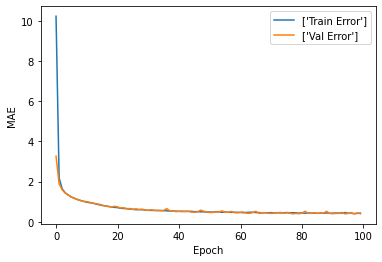

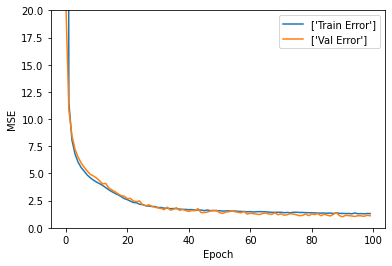

In [545]:
plot_history(history)

## Tune hyperparameters

## Test the model

In [536]:
# define model
model = KNeighborsRegressor()
# model = DecisionTreeRegressor()
model.fit(X_train, y_train)
print(model.predict(X_test))

c:\src\theBridge\course-env\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names



[[36.  21. ]
 [26.4  5.4]
 [33.6 31.2]
 ...
 [35.4 24.6]
 [36.   9.6]
 [ 1.8  1.2]]


In [537]:
i = 150
# test = X_test.iloc[i:i+1, :]
print(f'Real point {y_test.iloc[i:i+1, :]}')
print(f'Point predicted {model.predict(X_test.iloc[i:i+1:, :])}')

Real point          x     y
8262  36.0  19.2
Point predicted [[36.  19.2]]


c:\src\theBridge\course-env\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names



In [538]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

predictions = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))
print("MAE:", mean_absolute_error(y_test, predictions))

c:\src\theBridge\course-env\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names



MSE: 0.006035502958579897
RMSE: 0.07768849952586224
MAE: 0.006982248520710088
